<a href="https://colab.research.google.com/github/Aadarshdwi99/Insternship_Tasks/blob/main/PRODIGY_DS_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Original dataset not found. Creating sample data for demonstration...

Sample data created for demonstration purposes


/tmp/ipython-input-1-3246820972.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df,


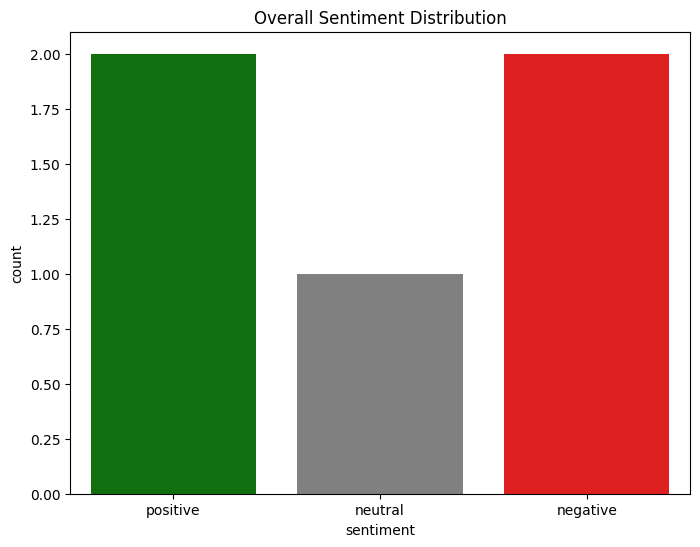

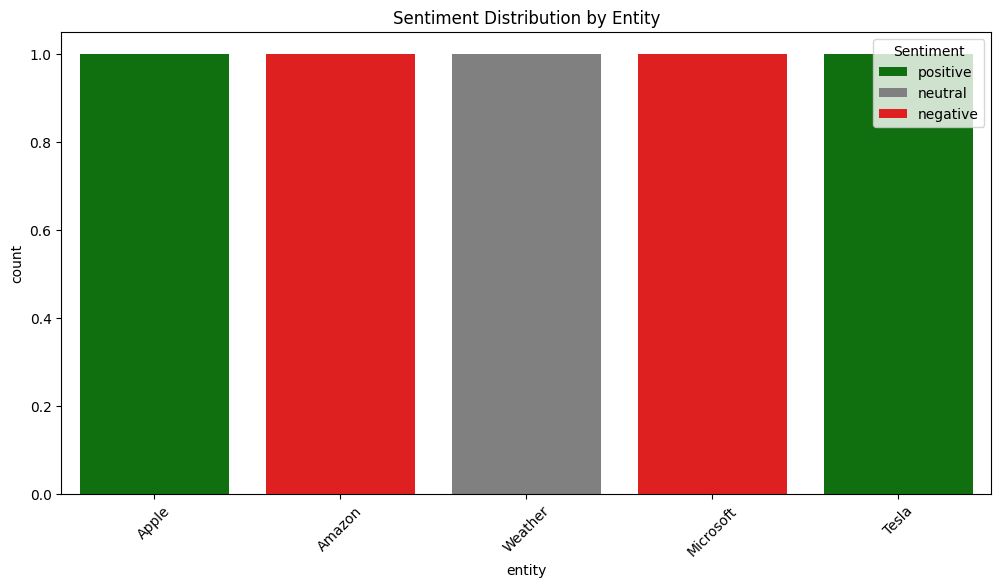

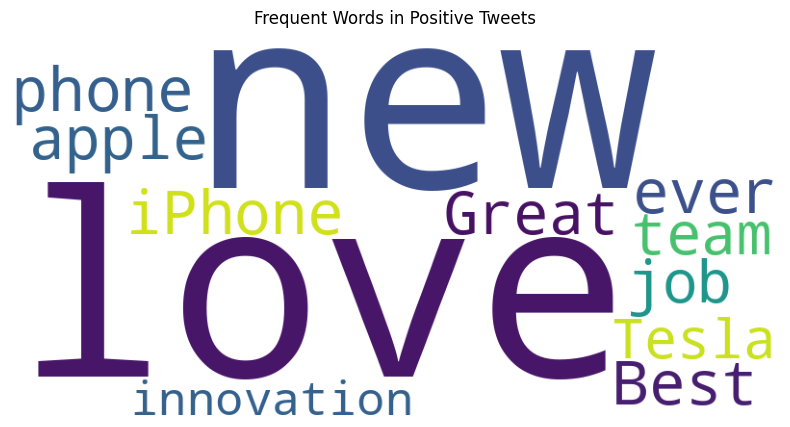

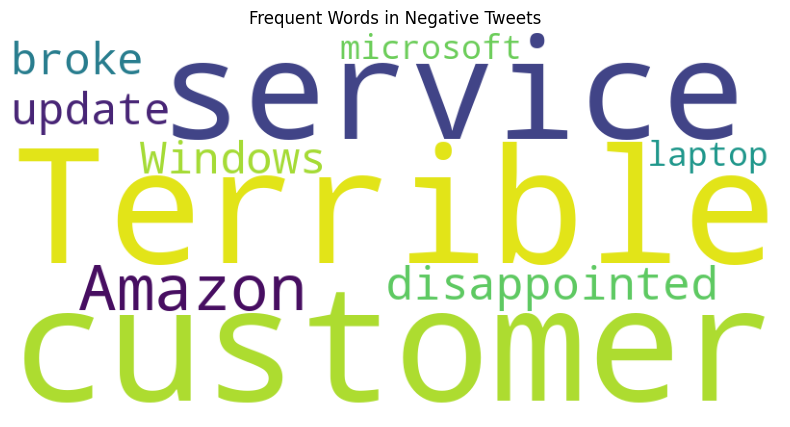

/tmp/ipython-input-1-3246820972.py:94: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hashtag_counts.values, y=hashtag_counts.index, palette='viridis')


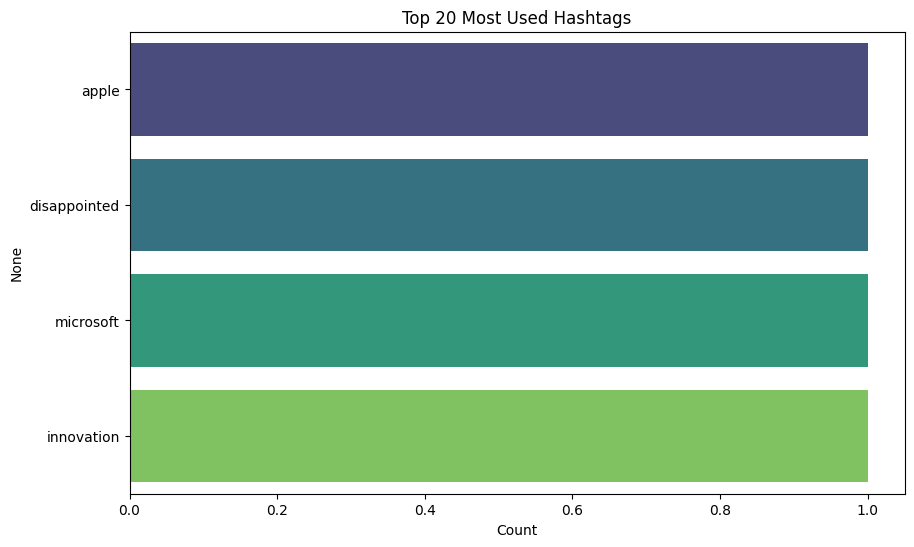


Analysis complete!


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk
import re

# Download NLTK stopwords if not already present
nltk.download('stopwords', quiet=True)

# Load data - UPDATE THIS FILENAME TO MATCH YOUR DOWNLOADED FILE
try:
    df = pd.read_csv('twitter_entity_sentiment.csv')  # Common filename for this dataset
    print("Data loaded successfully!")

    # Display basic info
    print("\nData Overview:")
    print(df.head())
    print("\nColumns:", df.columns.tolist())

except FileNotFoundError:
    print("Original dataset not found. Creating sample data for demonstration...")
    # Create sample data if real dataset isn't available
    sample_data = {
        'tweet_text': [
            'I love the new iPhone! Best phone ever #apple',
            'Terrible customer service from @Amazon #disappointed',
            'The weather is nice today',
            'Windows 11 update broke my laptop #microsoft',
            'Great job by the team @Tesla! #innovation'
        ],
        'sentiment': ['positive', 'negative', 'neutral', 'negative', 'positive'],
        'entity': ['Apple', 'Amazon', 'Weather', 'Microsoft', 'Tesla']
    }
    df = pd.DataFrame(sample_data)
    print("\nSample data created for demonstration purposes")

## 1. Basic Sentiment Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=df,
              palette={'positive':'green', 'neutral':'gray', 'negative':'red'},
              order=['positive', 'neutral', 'negative'])
plt.title('Overall Sentiment Distribution')
plt.show()

## 2. Sentiment by Entity
if 'entity' in df.columns:
    plt.figure(figsize=(12, 6))
    entity_order = df['entity'].value_counts().nlargest(10).index if len(df['entity'].unique()) > 10 else df['entity'].value_counts().index
    sns.countplot(x='entity', hue='sentiment', data=df[df['entity'].isin(entity_order)],
                  palette={'positive':'green', 'neutral':'gray', 'negative':'red'},
                  hue_order=['positive', 'neutral', 'negative'])
    plt.title('Sentiment Distribution by Entity')
    plt.xticks(rotation=45)
    plt.legend(title='Sentiment')
    plt.show()

## 3. Word Clouds by Sentiment
def generate_wordcloud(text, title):
    if len(text) > 0:
        wordcloud = WordCloud(width=800, height=400,
                             background_color='white',
                             stopwords=set(stopwords.words('english'))).generate(text)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud)
        plt.axis('off')
        plt.title(title)
        plt.show()
    else:
        print(f"No text available for {title}")

# Generate word clouds if tweet text exists
if 'tweet_text' in df.columns:
    # Positive words
    positive_text = ' '.join(df[df['sentiment'] == 'positive']['tweet_text'].astype(str))
    generate_wordcloud(positive_text, 'Frequent Words in Positive Tweets')

    # Negative words
    negative_text = ' '.join(df[df['sentiment'] == 'negative']['tweet_text'].astype(str))
    generate_wordcloud(negative_text, 'Frequent Words in Negative Tweets')

## 4. Hashtag Analysis
if 'tweet_text' in df.columns:
    def extract_hashtags(text):
        return re.findall(r'#(\w+)', str(text).lower())

    df['hashtags'] = df['tweet_text'].apply(extract_hashtags)
    all_hashtags = [tag for sublist in df['hashtags'] for tag in sublist]

    if len(all_hashtags) > 0:
        hashtag_counts = pd.Series(all_hashtags).value_counts().nlargest(20)
        plt.figure(figsize=(10, 6))
        sns.barplot(x=hashtag_counts.values, y=hashtag_counts.index, palette='viridis')
        plt.title('Top 20 Most Used Hashtags')
        plt.xlabel('Count')
        plt.show()
    else:
        print("No hashtags found in the data")

print("\nAnalysis complete!")